## Task 23 - Unsupervised learning - *K*-means clustering

In this task we use unsupervised *K*-means clustering to group countries using socio-economic and health factors to determine the development status of each country.

In [24]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [25]:
# Random state seed
rseed = 42

### Load and explore data

In [26]:
# Import the dataset

df = pd.read_csv('Country-data.csv')

In [27]:
# Check the shape
df.shape

(167, 10)

In [28]:
# Check datatypes & counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [29]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [30]:
# Check that there isn't any missing data

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Preprocessing and Feature Selection

In [31]:
# Drop any non-numeric features (columns)
df=df.drop(['country'],axis=1)

<Axes: >

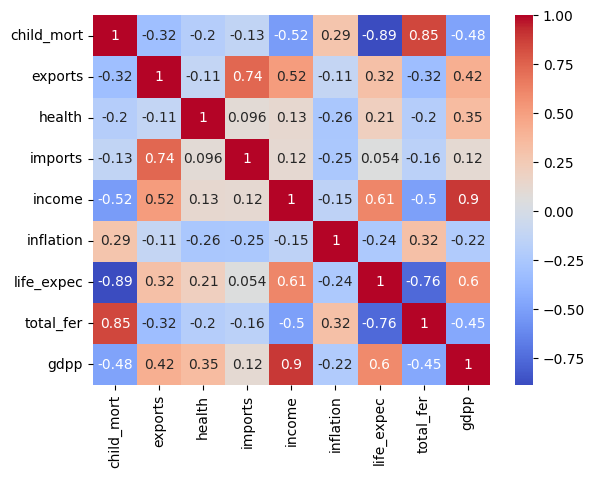

In [32]:
# Create a correlation map of features to explore relationships between features
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

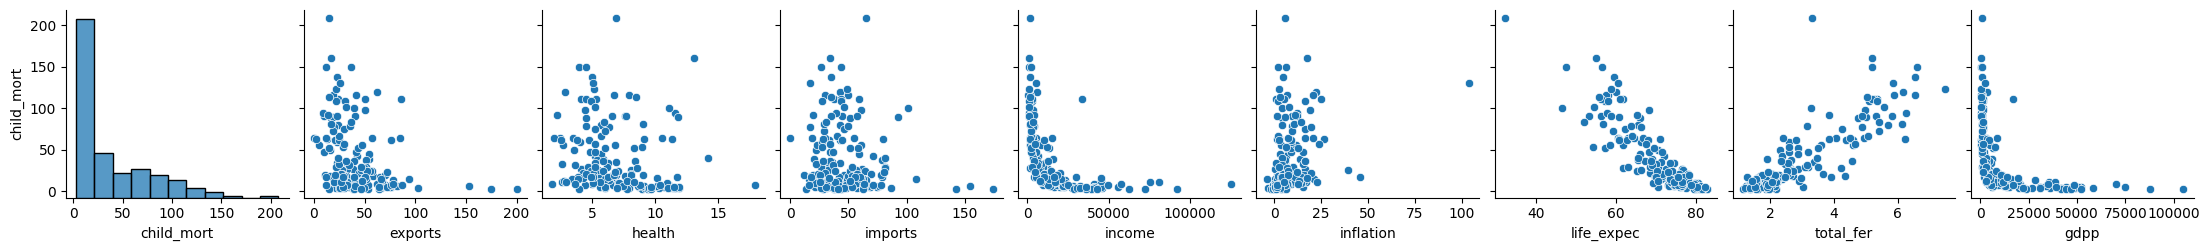

In [33]:
# Explore the continuous independent features against child_mort using scatter plots.

sns.pairplot(data = df,
                  y_vars=['child_mort'],
                  x_vars=df.columns)

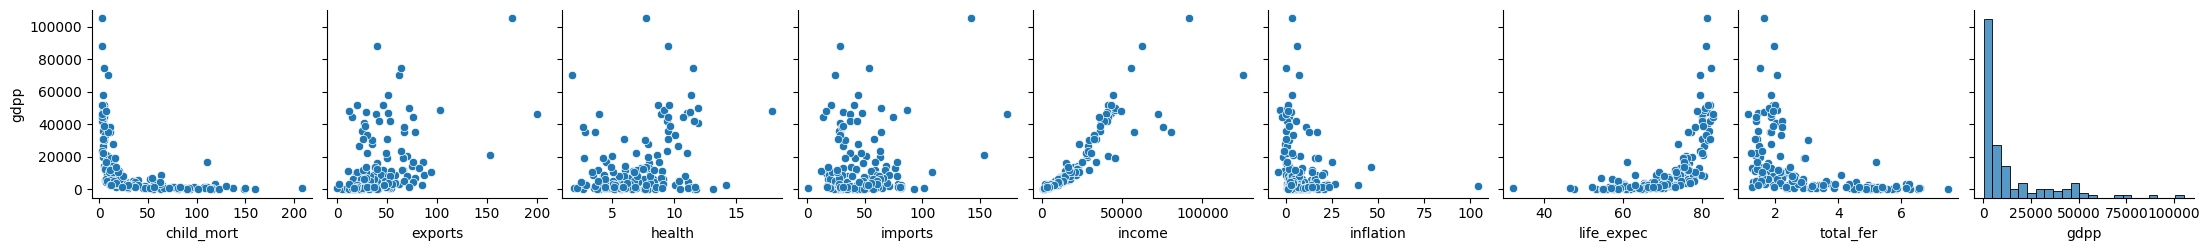

In [34]:
# Explore the continuous independent features against gdpp using scatter plots.
sns.pairplot(data = df,
                  y_vars=['gdpp'],
                  x_vars=df.columns)

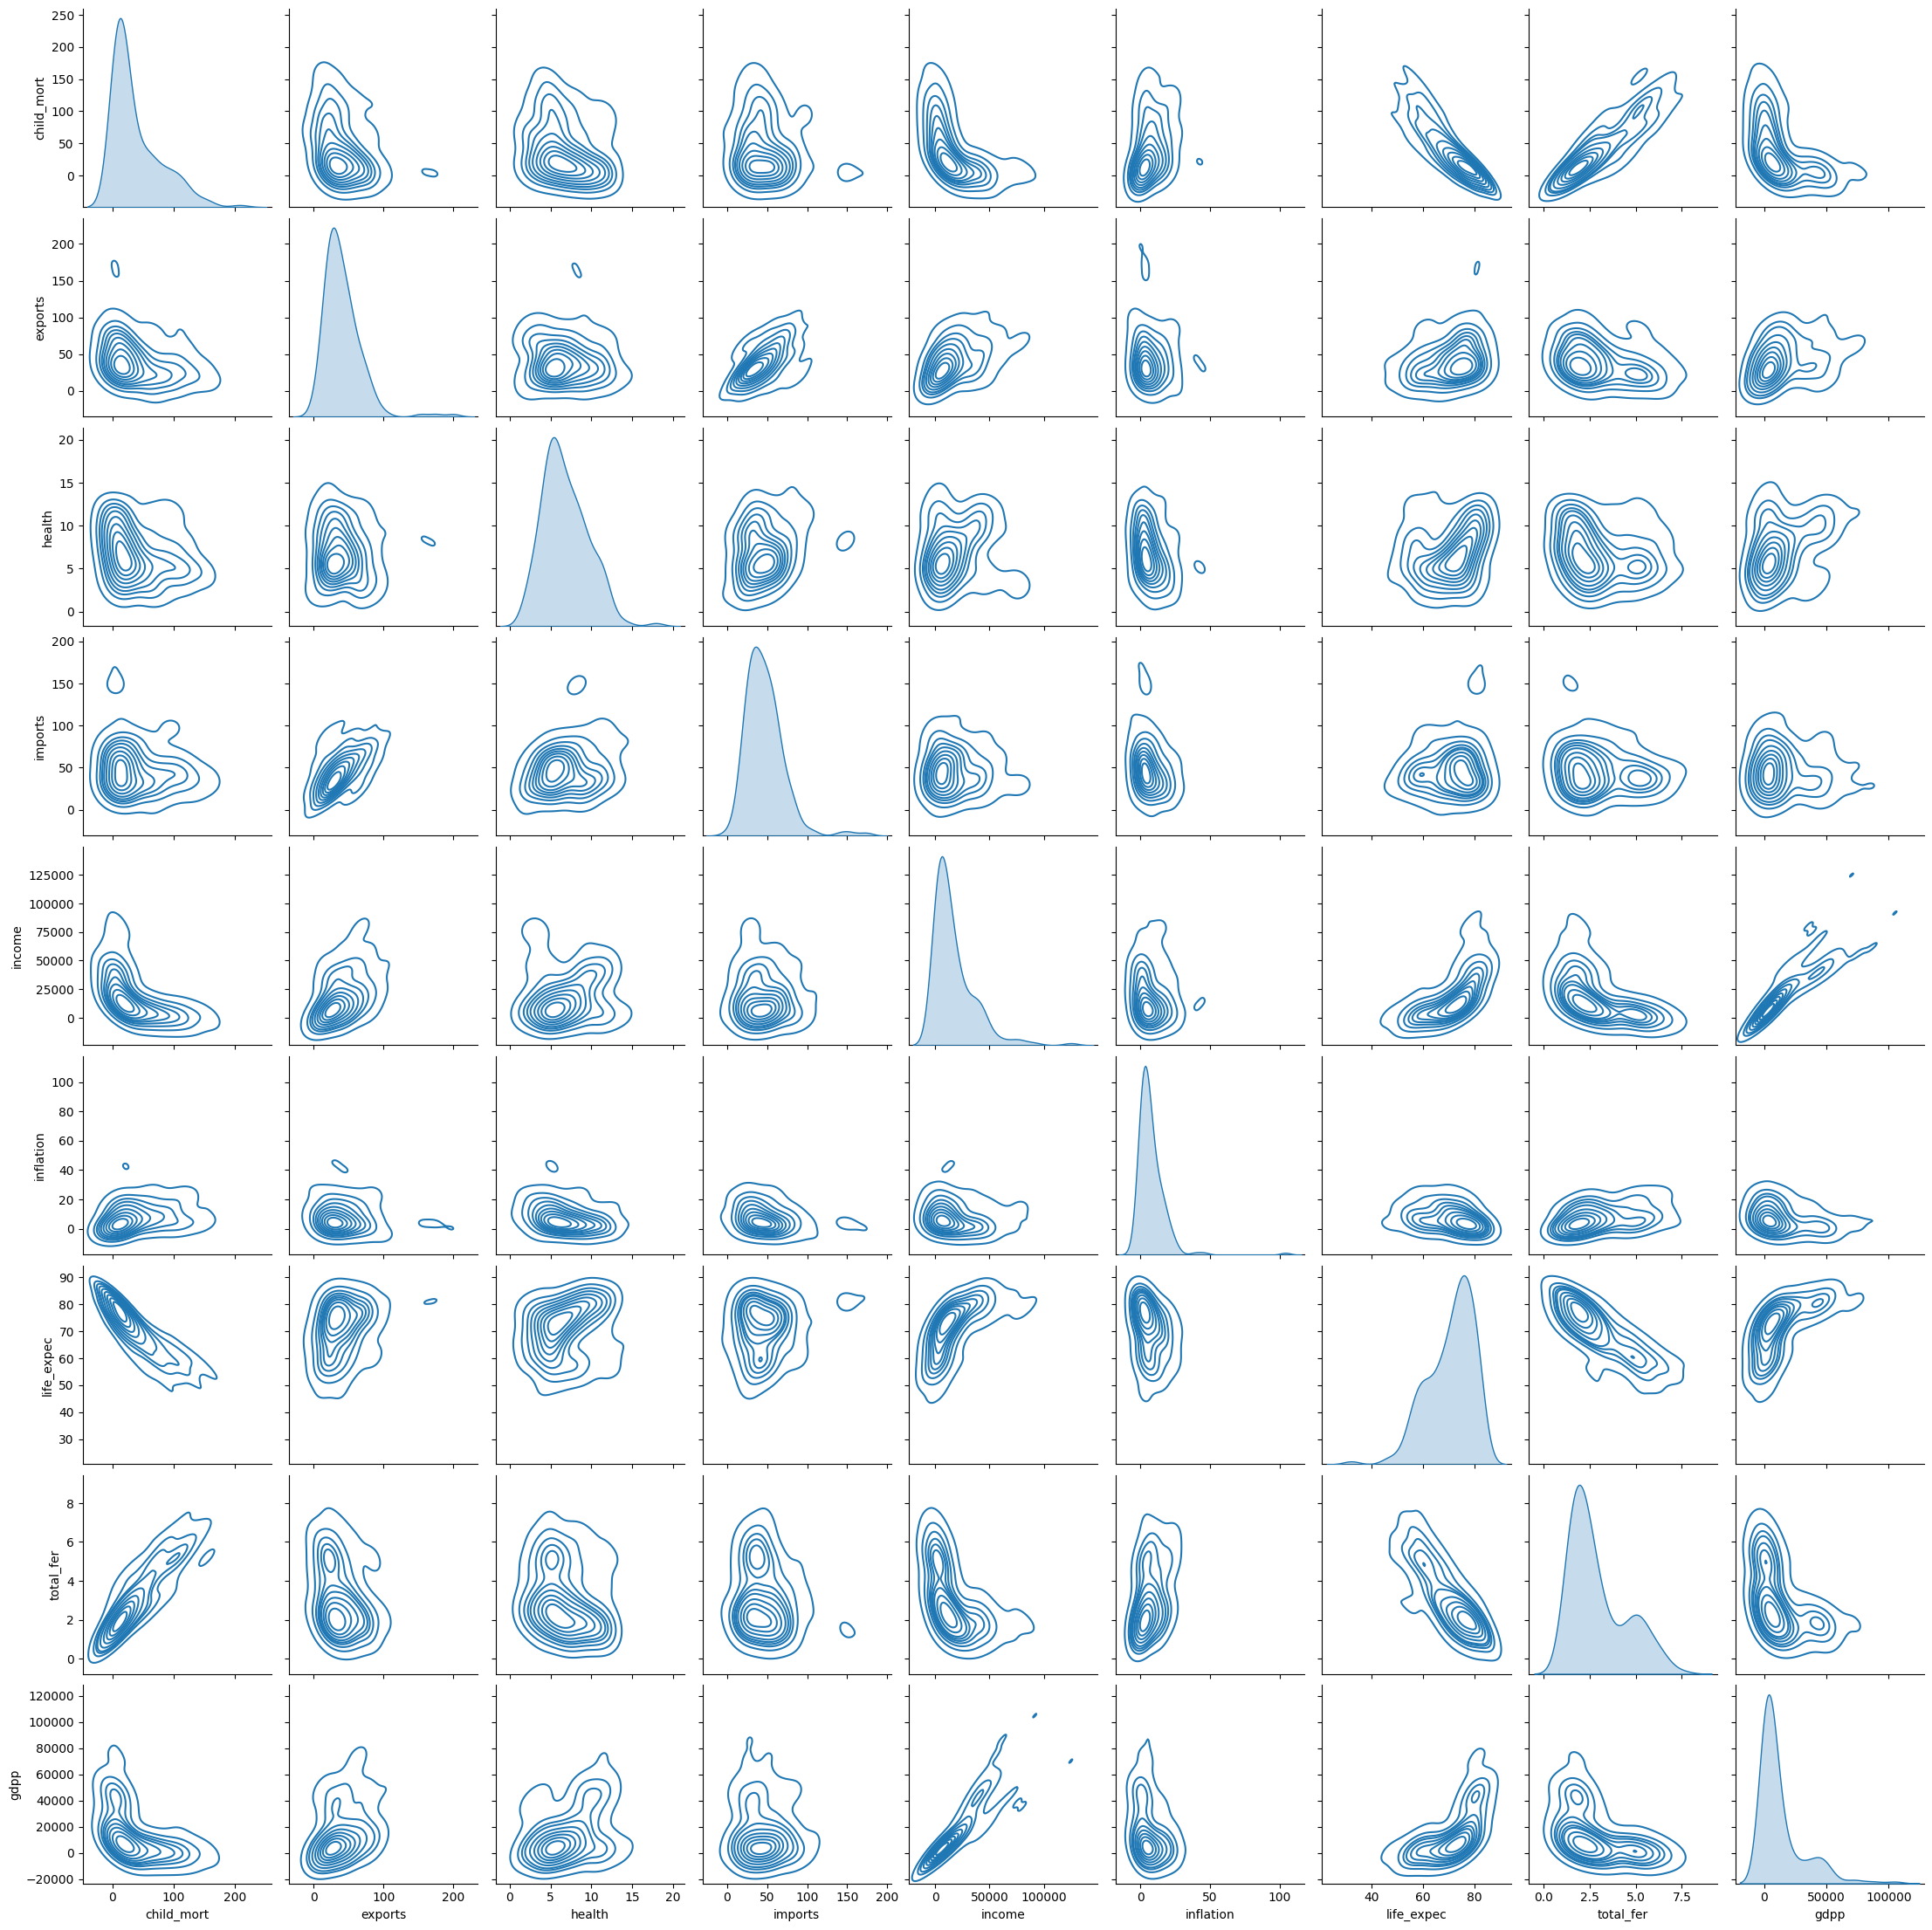

In [12]:
# Create a pair plot using seaborn pairplot

sns.pairplot(data = df, kind='kde')
plt.show()

Looking at the peaks in the diagonal graphs plus contours of the off-diagonal kernel density estimate (KDE) plots it seems that life expectancy *life_expec*, total fertility *total_fer* and GDP per capita *gdpp* will be good candidates for clustering the data.

From the below scatter plots *gdpp* against *total_fer* looks the most promising for separating into clusters.

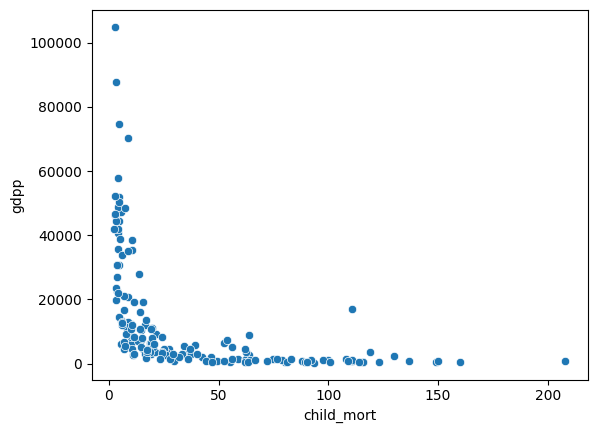

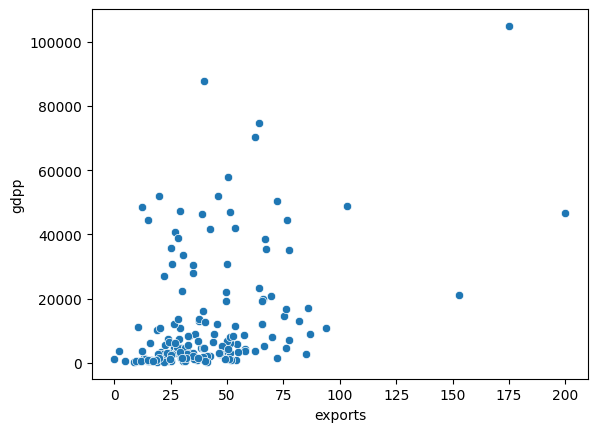

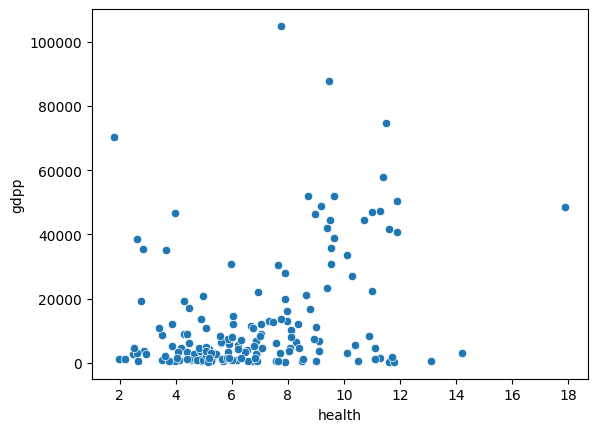

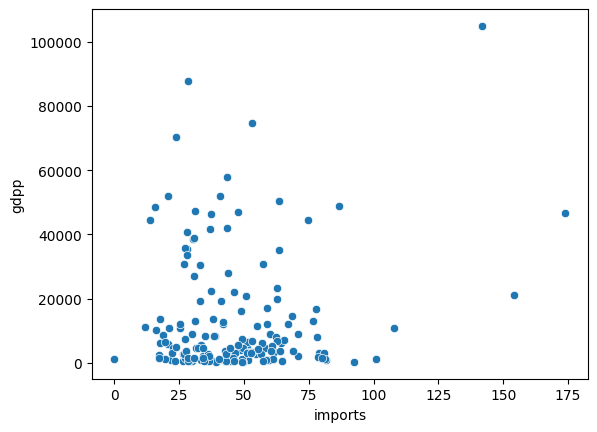

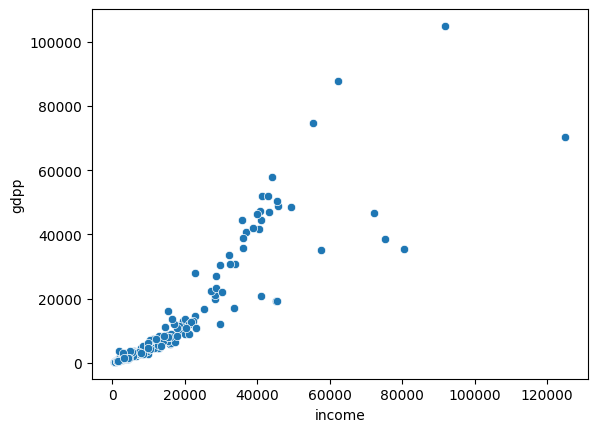

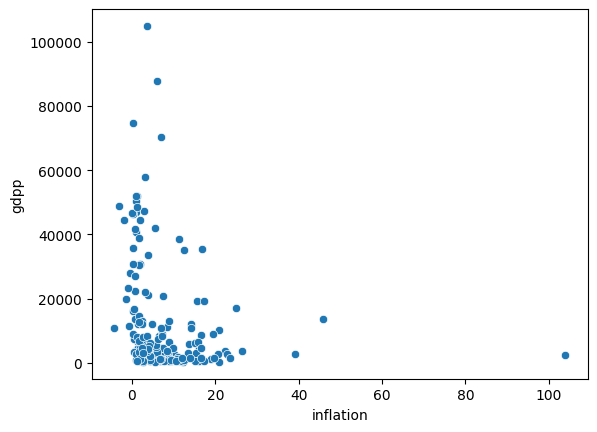

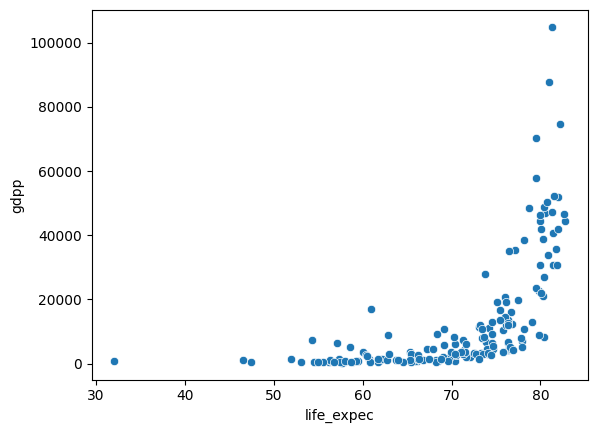

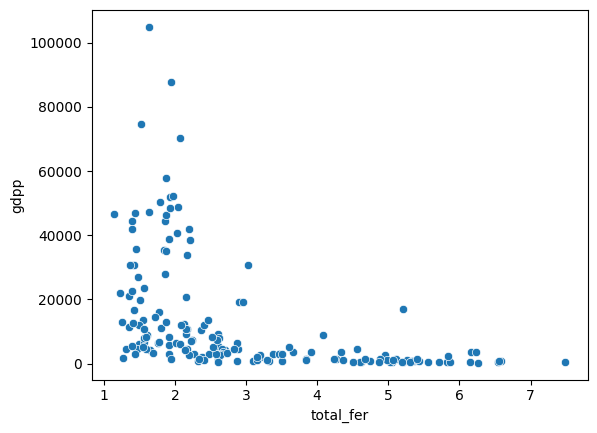

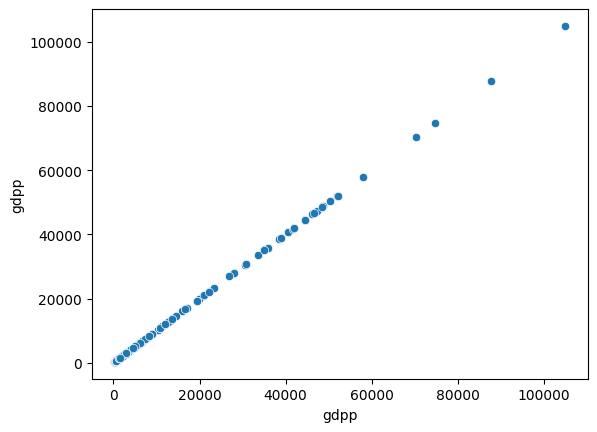

In [13]:
# Explore the continuous independent features against gdpp using scatter plots, this time using a for loop.
for col in df.columns:
    sns.scatterplot(data = df, y = df['gdpp'], x = col)
    plt.show()

### Scaling the Data

Here we normalise the data using MinMaxScaler

In [14]:
# Normalise the data using MinMaxScaler
sc =  MinMaxScaler()

# Fit and apply the MinMax scalar to the data
sc.fit(df)
df_scaled = sc.transform(df)

## *K*-Means Clustering

### Selecting *K*

Next we find the optimal number of clusters using the elbow and silhouette score method.


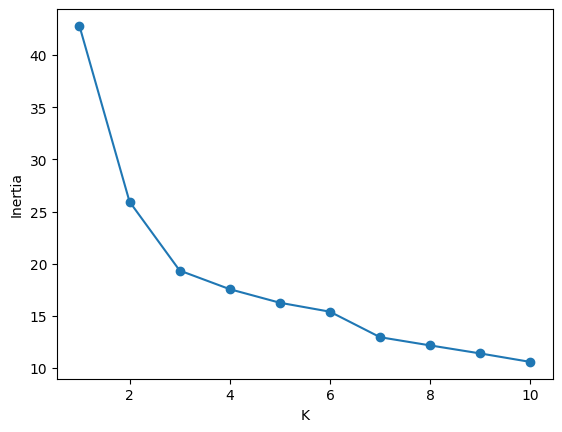

In [15]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

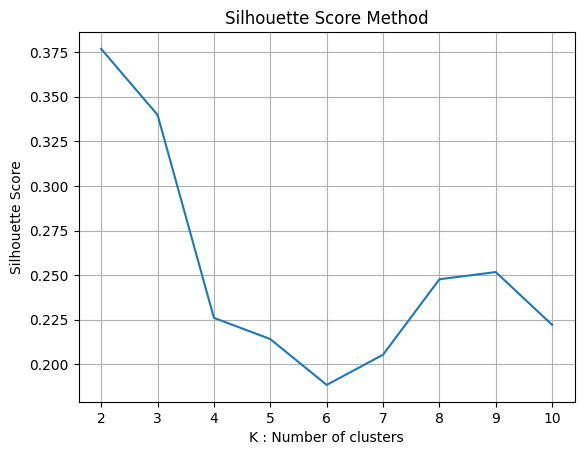

In [16]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('K : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method I will choose 3 as the value for *K*, and so cluster into 3 groups.

### Fitting a *K*-Means model with 3 clusters

In [17]:
# Fit a K-means model to the scaled dataset
k = 3
kmeans = KMeans(n_clusters=k, random_state=rseed)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [18]:
# Count the number of records in each cluster
label, count = np.unique(labels, return_counts=True)

for i in label:
    print(f"The size of cluster {label[i]} is {count[i]}")

The size of cluster 0 is 87
The size of cluster 1 is 35
The size of cluster 2 is 45


In [19]:
# report model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.340


The above value of the silhouette score of 0.34 matches the value for *K*=3 on the above silhouette score method line graph.

## Predictions

In [20]:
# Add the predicted cluster label column to the original dataframe

df_clusters = df.copy()
df_clusters['cluster'] = labels

## Visualisation of clusters

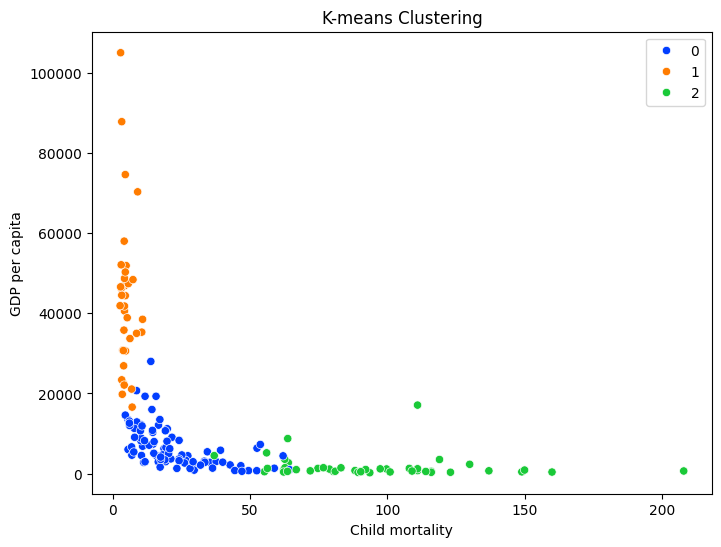

In [21]:
# Visualisation of clusters: child mortality vs gdpp

plt.figure(figsize=(8, 6))
sns.scatterplot(y=df_clusters['gdpp'], x = df_clusters['child_mort'], hue=labels, palette='bright')
plt.xlabel('Child mortality')
plt.ylabel('GDP per capita')
plt.title('K-means Clustering')
plt.show()

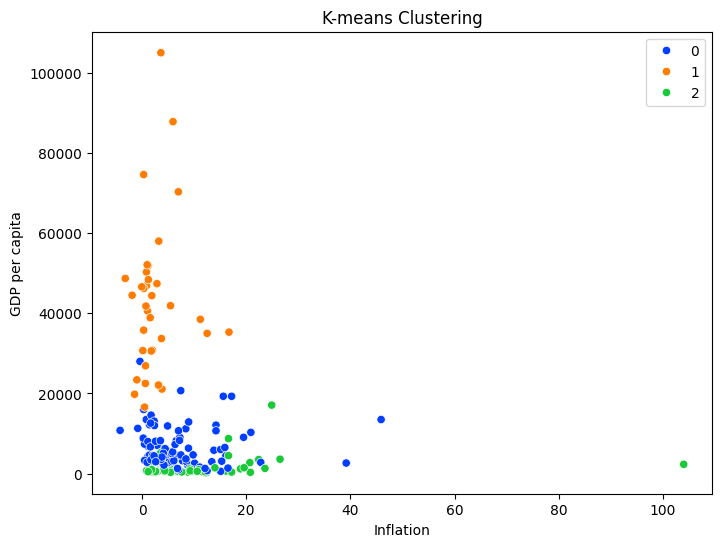

In [22]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(8, 6))
sns.scatterplot(y=df_clusters['gdpp'], x = df_clusters['inflation'], hue=labels, palette = 'bright')
plt.xlabel('Inflation')
plt.ylabel('GDP per capita')
plt.title('K-means Clustering')
plt.show()

### Conclusions

The countries with the highest GDP per capita and lowest child mortality & inflation have label 1 and we can conclude that these are the developed nations. Similarly the countires with the lowest GDP per capital and highest child mortality have label 2 and we can conclude that these are the least developed. The countries that lie in between have label 0 and we can say that these are the developing countries. 

We perform this cluster mapping below and plot GDP per capita vs Child mortality to illustrate this identification. 

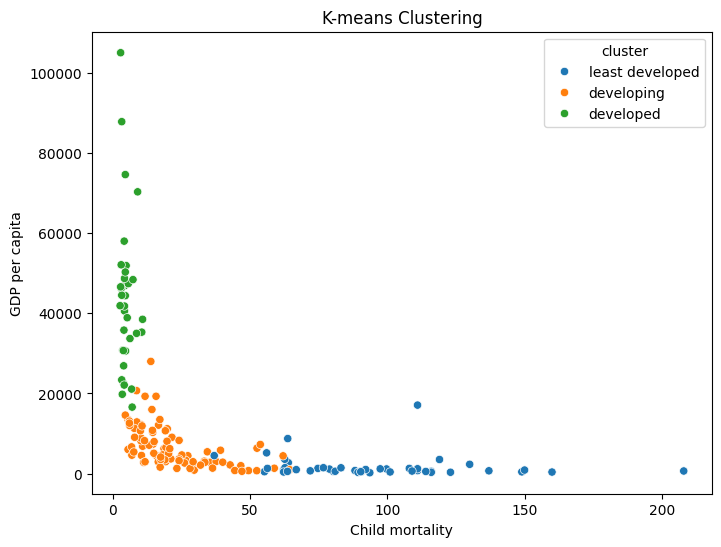

In [23]:
# cluster mapping
cluster_mapping = {0: 'developing', 1: 'developed', 2: 'least developed'}
df_clusters['cluster'] = df_clusters['cluster'].replace(cluster_mapping)

# re-plot gdpp vs child mortality
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df_clusters['gdpp'], x = df_clusters['child_mort'], hue=df_clusters['cluster'])
plt.xlabel('Child mortality')
plt.ylabel('GDP per capita')
plt.title('K-means Clustering')
plt.show()